In [1]:
import pandas as pd
!pip3 install yfinance
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

     |████████████████████████████████| 6.3MB 7.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=ca077808150418c993f6ffcf4eb13e1026b22ba082982636715e6b9e9314a3a4
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
msft = yf.Ticker("MSFT")

In [3]:
df = msft.history(period="max")

In [4]:
print(df.head())

                Open      High       Low  ...      Volume  Dividends  Stock Splits
Date                                      ...                                     
1986-03-13  0.056238  0.064508  0.056238  ...  1031788800        0.0           0.0
1986-03-14  0.061751  0.065059  0.061751  ...   308160000        0.0           0.0
1986-03-17  0.063956  0.065610  0.063956  ...   133171200        0.0           0.0
1986-03-18  0.065059  0.065610  0.062853  ...    67766400        0.0           0.0
1986-03-19  0.063405  0.063956  0.061751  ...    47894400        0.0           0.0

[5 rows x 7 columns]


In [5]:
df=df[['Close']]

In [6]:
df

,Close
Date,
1986-03-13,0.061751
1986-03-14,0.063956
1986-03-17,0.065059
1986-03-18,0.063405
1986-03-19,0.062302
...,...
2021-04-28,254.559998
2021-04-29,252.509995
2021-04-30,252.179993


In [7]:
# A variable for predicting 'n' days out into the future
forecast_out = 30
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-forecast_out)
#print the new data set
print(df.tail())

                 Close  Prediction
Date                              
2021-04-28  254.559998         NaN
2021-04-29  252.509995         NaN
2021-04-30  252.179993         NaN
2021-05-03  251.860001         NaN
2021-05-04  247.789993         NaN


In [8]:

X = np.array(df.drop(['Prediction'],1))


X = X[:-forecast_out]
print(X)

[[6.17506094e-02]
 [6.39558807e-02]
 [6.50591105e-02]
 ...
 [2.30720001e+02]
 [2.30350006e+02]
 [2.35990005e+02]]


In [9]:

y = np.array(df['Prediction'])

y = y[:-forecast_out]
print(y)

[7.44320378e-02 7.49833658e-02 7.27774575e-02 ... 2.52179993e+02
 2.51860001e+02 2.47789993e+02]


In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [11]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
#  Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:

svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9936500371533601


In [14]:

x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[237.58000183]
 [235.46000671]
 [232.33999634]
 [236.47999573]
 [235.24000549]
 [231.8500061 ]
 [235.77000427]
 [242.3500061 ]
 [249.07000732]
 [247.86000061]
 [249.8999939 ]
 [253.25      ]
 [255.8500061 ]
 [255.91000366]
 [258.48999023]
 [255.58999634]
 [259.5       ]
 [260.73999023]
 [258.73999023]
 [258.26000977]
 [260.57998657]
 [257.17001343]
 [261.1499939 ]
 [261.54998779]
 [261.97000122]
 [254.55999756]
 [252.50999451]
 [252.17999268]
 [251.86000061]
 [247.78999329]]


In [15]:

svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[249.68605461 252.09587325 255.88045615 253.40285408 252.01402254
 254.01181076 252.47696579 232.64580231 139.14553868 159.21225122
 132.46224821 127.64487936 127.60754577 127.60752009 127.60734304
 127.60770474 127.60734278 127.60734276 127.6073429  127.60734328
 127.60734276 127.60735162 127.60734276 127.60734276 127.60734276
 127.61050577 127.7392942  127.83100192 127.97320744 160.79617582]


In [16]:
type(x_test)

numpy.ndarray

In [17]:
svm_prediction=pd.DataFrame(svm_prediction)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

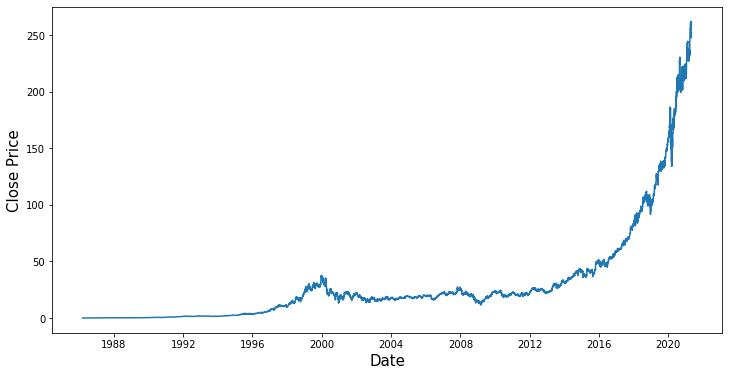

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df["Close"])

plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price',fontsize=15)
plt.show()

In [20]:
# plt.figure(figsize = (12,6))
# plt.plot(svm_prediction)
# plt.xlabel('Date',fontsize=15)
# plt.ylabel('Close Price',fontsize=15)
# plt.show()

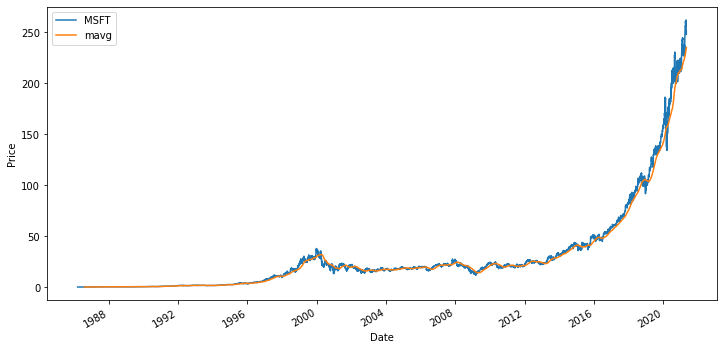

In [21]:
# Rolling mean
close_px = df['Close']
mavg = close_px.rolling(window=100).mean()

plt.figure(figsize = (12,6))
close_px.plot(label='MSFT')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [22]:

# # Use sklearn support vector regression to predicit our data:
# from sklearn.svm import SVR

# dates = dates_df['Date'].as_matrix()
# prices = df['Close'].as_matrix()

# #Convert to 1d Vector
# dates = np.reshape(dates, (len(dates), 1))
# prices = np.reshape(prices, (len(prices), 1))

# svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
# svr_rbf.fit(dates, prices)

# plt.figure(figsize = (12,6))
# plt.plot(dates, prices, color= 'black', label= 'Data')
# plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [23]:
import matplotlib.dates as mdates

# change the dates into ints for training 
dates_df = df.copy()
dates_df = dates_df.reset_index()

# Store the original dates for plotting the predicitons
org_dates = dates_df['Date']

# convert to ints
dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

dates_df.tail()

,Date,Close,Prediction
8853,737908.0,254.559998,NaN
8854,737909.0,252.509995,NaN
8855,737910.0,252.179993,NaN
8856,737913.0,251.860001,NaN
8857,737914.0,247.789993,NaN
